## Guassian Mixtures 
## Réaliser par : DAGHMOUMI Marouan / BENJELLOUN Abdelmajid
## Encadrer par : Pr. EN-NAIMI El Mokhtar

<h1>Table des matières<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Motivation-pour-les-mixtures-gaussiennes" data-toc-modified-id="Motivation-pour-les-mixtures-gaussiennes-1">Motivation pour les mixtures gaussiennes</a></span></li><li><span><a href="#Dérivation-de-la-mixture-gaussienne" data-toc-modified-id="Dérivation-de-la-mixture-gaussienne-2">Dérivation de la mixture gaussienne</a></span></li><li><span><a href="#Maximum-de-vraisemblance-pour-les-mixtures-gaussiennes-et-dérivation-de-l'algorithme-EM" data-toc-modified-id="Maximum-de-vraisemblance-pour-les-mixtures-gaussiennes-et-dérivation-de-l'algorithme-EM-3">Maximum de vraisemblance pour les mixtures gaussiennes &amp; Dérivation de l'algorithme EM</a></span></li><li><span><a href="#Comment-fonctionne-l'algorithme-EM-?" data-toc-modified-id="Comment-fonctionne-l'algorithme-EM-?-4">Comment fonctionne l'algorithme EM ?</a></span><ul class="toc-item"><li><span><a href="#1.-Initialisation:" data-toc-modified-id="1.-Initialisation:-4.1">1. Initialisation :</a></span></li><li><span><a href="#2.-L'étape-E:" data-toc-modified-id="2.-L'étape-E:-4.2">2. L'étape E :</a></span></li><li><span><a href="#3.-L'étape-M:" data-toc-modified-id="3.-L'étape-M:-4.3">3. L'étape M :</a></span></li><li><span><a href="#4.--Évaluation-de-la-log-vraisemblance-:" data-toc-modified-id="4.--Évaluation-de-la-log-vraisemblance-:-4.4">4.  Évaluation de la log-vraisemblance :</a></span></li></ul></li><li><span><a href="#Implémentation-(sans-évaluation-de-la-log-vraisemblance)" data-toc-modified-id="Implémentation-(sans-évaluation-de-la-log-vraisemblance)-5">Implémentation (sans évaluation de la log-vraisemblance)</a></span><ul class="toc-item"><li><span><a href="#Outils-de-traçage" data-toc-modified-id="Outils-de-traçage-5.1">Outils de traçage</a></span></li><li><span><a href="#Exemple-1-:-Ensemble-de-données-2D-simple" data-toc-modified-id="Exemple-1-:-Ensemble-de-données-2D-simple-5.2">Exemple 1 : Ensemble de données 2D simple</a></span></li><li><span><a href="#Exemple-2-:-compression-d'image" data-toc-modified-id="Exemple-2-:-compression-d'image-5.3">Exemple 2 : compression d'image</a></span></li></ul></li><li><span><a href="#Sources:" data-toc-modified-id="Sources:-6">Sources :</a></span></li></ul></div>

# Motivation pour les mixtures gaussiennes
Une seule distribution gaussienne est très limitée pour modéliser des données. Avec un mélange gaussien, une superposition linéaire de plusieurs distributions gaussiennes, on peut souvent obtenir une meilleure caractérisation des données.

$$ p(x) = \sum_{k=1}^{K} \pi _{k}N(x_{n}\mid\mu_{k}, \Sigma_{k}) $$
<img src="imgs/motivation.png" style="height:400px">



# Dérivation de la mixture gaussienne

-> blackboard

Example:
<img src="imgs/gaussian_mixture.png" style="height:300px">

**(a)** La distribution conjointe $p(z)p(x|z)$ indique les états de $z$ correspondant aux couleurs => complète  
**(b)** $p(x)$ les données observées ne fournissent plus d'informations sur les variables latentes responsables => incomplète  
**(c)** Les couleurs représentent les responsabilités $\gamma(z_{nk})$ pour chaque point de données $x_n$

# Maximum de vraisemblance pour les mixtures gaussiennes & Dérivation de l'algorithme EM

-> blackboard

# Comment fonctionne l'algorithme EM ?
L'algorithme EM est un processus itératif qui commence par une initialisation et alterne ensuite entre les étapes d'espérance et de maximisation jusqu'à ce que l'algorithme atteigne la convergence.

## 1. Initialisation :

Initialiser les moyennes $\mu_k$, les covariances $\Sigma_k$ et les coefficients de mélange $\pi_k$, et évaluer la valeur initiale de la log-vraisemblance.

Il est courant d'exécuter d'abord l'algorithme K-means pour trouver une initialisation appropriée pour l'algorithme EM. Les matrices de covariance $\Sigma_k$ peuvent être initialisées avec les covariances échantillons des clusters trouvés par K-means. Les coefficients de mélange $\pi_k$ peuvent être définis comme les fractions de points de données assignés au cluster respectif, c'est-à-dire : $$\pi_{k_{init}} = \frac{N_{k}}{N}$$


<img src="imgs/init.png" style="height:250px">

## 2. Étape E :

Nous calculons les valeurs attendues $E(z_{ij})$, qui représentent la probabilité que $x_i$ soit tiré de la $j$-ième distribution.
    
$$\gamma(z_{nk}) = \frac{\pi _{k}N(x_{n}\mid\mu_{k}, \Sigma_{k})}{\sum_{j=1}^{K}\pi _{j}N(x_{n}\mid\mu_{j}, \Sigma_{j})}$$

Cette formule indique simplement que la valeur attendue pour $z_{ij}$ est la probabilité que $x_i$ appartienne à $\mu_j$ divisée par la somme des probabilités que $x_i$ appartienne à chaque $\mu$.

<img src="imgs/expectation.png" style="height:250px">

## 3. Étape M :
Ré-estimer les paramètres en utilisant les responsabilités actuelles

$$\mu_{k}^{nouveau} = \frac{1}{N_{k}}\sum_{n=1}^{N}\gamma(z_{nk})x_{n}$$
$$\Sigma_{k}^{nouveau} = \frac{1}{N_{k}}\sum_{n=1}^{N}\gamma(z_{nk})(x_{n}-\mu_{k}^{nouveau})(x_{n}-\mu_{k}^{nouveau})^{T}$$
$$\pi_{k}^{nouveau} = \frac{N_{k}}{N}$$
où
$$N_{k} = \sum_{n=1}^{N}\gamma(z_{kn}).$$

En répétant l'étape E et l'étape M, nous sommes assurés d'augmenter la log-vraisemblance, donc elle convergera vers un maximum local. Cela sera discuté dans la troisième présentation.

<img src="imgs/maximization.png" style="height:250px">

## 4.  Évaluer la log-vraisemblance :

$$\ln\quad p(X\mid \mu ,\Sigma ,\pi ) = \sum_{n=1}^{N}\ln\left \{ \sum_{k=1}^{K}\pi_{k}N(x_{n}\mid \mu_{k},\Sigma_{k}) \right \}$$

et vérifier la convergence des paramètres ou de la log-vraisemblance. Si le critère de convergence n'est pas satisfait, revenir à l'étape 2.
<img src="imgs/convergence.png" style="height:250px">

# Implémentation (sans évaluation de la log-vraisemblance)

In [12]:
import numpy as np
from scipy.stats import multivariate_normal

def expectation(X, cluster_centers, cluster_covs, mixing_coeffs):
    responsibilities = np.zeros((cluster_centers.shape[0], X.shape[0]))
    divisor_sum = np.zeros((X.shape[0]))

    for i, (mean, cov, mixing_coeff) in enumerate(zip(cluster_centers, cluster_covs, mixing_coeffs)):
        resp = mixing_coeff * multivariate_normal.pdf(X, mean, cov, allow_singular=True)
        responsibilities[i] = resp
        divisor_sum += resp
    responsibilities /= divisor_sum
    return responsibilities

def maximization(X, responsibilities, cluster_centers, cluster_covs, mixing_coeffs, init_cov_size):
    for i, resp in enumerate(responsibilities):
        Nk = resp.sum()
        if Nk <= 1:
            print("Singularity detected")
            rand = np.random.choice(datapoints, cluster_centers.shape[0], replace=False)
            new_mean = X[rand, :]
            new_cov = np.eye(X.shape[1]) * init_cov_size
        else:
            new_mean = 1/Nk * (resp[:, np.newaxis] * X).sum(axis=0)
            unweighted_product = np.einsum('ji,jk->jik', (X-new_mean), (X-new_mean))
            cov_sum = (resp[:, np.newaxis, np.newaxis] * unweighted_product).sum(axis=0)
            new_cov = 1/Nk * cov_sum
        new_mixing_coeff = Nk/X.shape[0]

        cluster_centers[i] = new_mean
        cluster_covs[i] = new_cov
        mixing_coeffs[i] = new_mixing_coeff

def fit(X, clusters=2, iterations=10, init_cov_size=120):
    datapoints = X.shape[0]
    dims = X.shape[1]
    rand = np.random.choice(datapoints, clusters, replace=False)
    cluster_centers = X[rand, :]
    cluster_covs = np.stack([np.eye(dims) * init_cov_size] * clusters, axis=0)
    mixing_coeffs = np.full(clusters, 1/clusters)

    for _ in range(iterations):
        # Expectation
        responsibilities = expectation(X, cluster_centers, cluster_covs, mixing_coeffs)
        # Maximization
        maximization(X, responsibilities, cluster_centers, cluster_covs, mixing_coeffs, init_cov_size)

    return cluster_centers, cluster_covs

def predict(X, cluster_centers, responsibilities):
    cluster_prediction = responsibilities.argmax(axis=0)
    prediction = np.copy(X)
    for i, mean in enumerate(cluster_centers):
        prediction[cluster_prediction==i] = mean
    return prediction


## Outils de traçage

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def oval(cov, num_points=100, radius=1):
    arcs = np.linspace(0, 2 * np.pi, num_points)
    x = radius * np.sin(arcs)
    y = radius * np.cos(arcs)
    
    xy = np.array(list(zip(x, y)))
    x, y = zip(*xy.dot(cov))
    return x, y

def make_plot(X, cluster_centers, cluster_covs, responsibilities, iteration):
    plt.figure(figsize=(6, 5))
    plt.title("EM iteration {}".format(iteration))
    colors = ['g', 'r', 'c', 'm', 'y', 'b']
    x, y = zip(*X)
    try:
        plt.scatter(x, y, edgecolors="black", c=responsibilities[0], cmap='RdYlGn')
    except AttributeError:
        plt.scatter(x, y, edgecolors="black", color='y')
    for i in range(cluster_centers.shape[0]):
        plt.scatter(cluster_centers[i, 0], cluster_centers[i, 1], s=250, color=colors[i], edgecolors="white")
        x, y = oval(cluster_covs[i], radius=2)
        x += cluster_centers[i, 0]
        y += cluster_centers[i, 1]
        plt.plot(x, y, linewidth=5, color=colors[i])


## Exemple 1 : Ensemble de données 2D simple

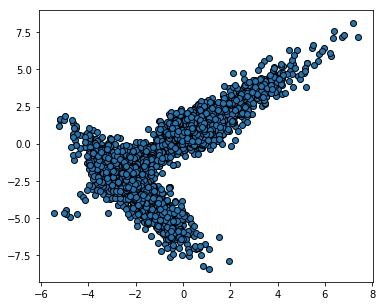

In [3]:
import pandas as pd
X = pd.read_csv("data/2d-em.csv", header=None).as_matrix()

x, y = zip(*X)
plt.figure(figsize=(6, 5))
plt.scatter(x, y, edgecolors="black")

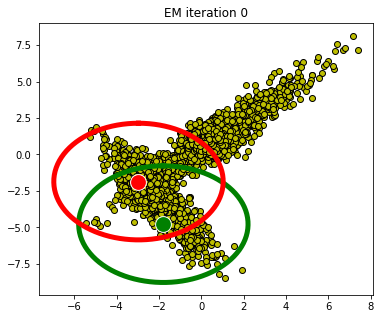

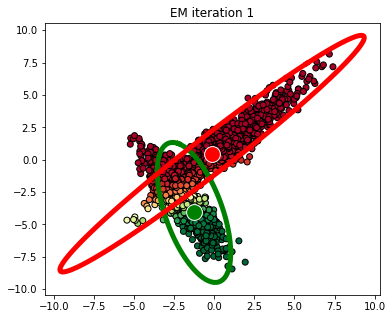

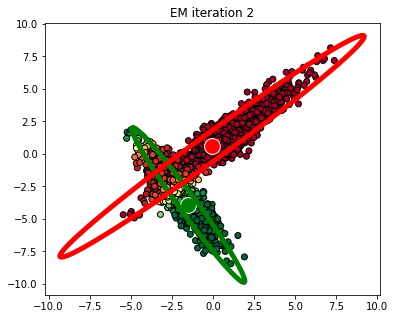

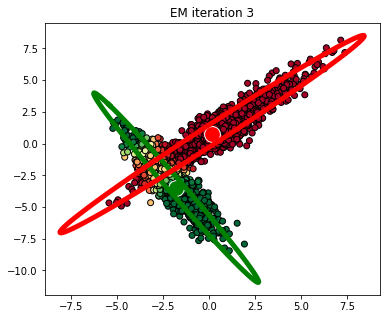

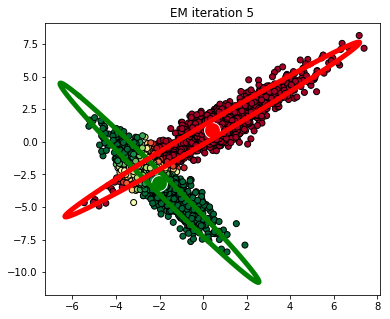

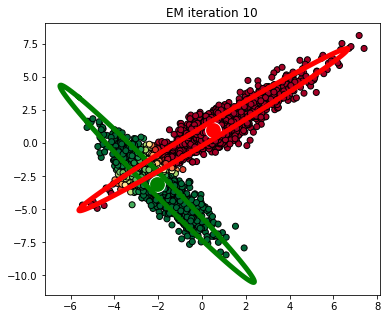

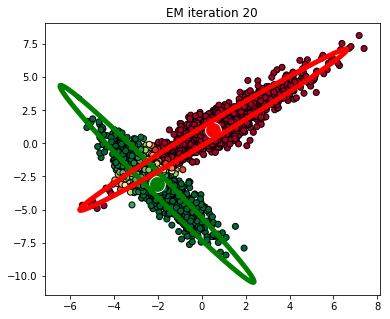

In [4]:
a = EM(X,2,init_cov_size=2)
for i in [1,1,1,2,5,10,10]:
    make_plot(a)
    mm = a.fit(i)

## Exemple 2 : Compression d'image

Les images RVB ne sont rien de plus qu'une grande matrice 2D de pixels. Chaque pixel prend trois valeurs entre 0 et 255, correspondant à l'intensité des canaux de couleur rouge, vert ou bleu. Ainsi, en combinaison, il existe 255x255x255 valeurs de couleur différentes possibles pour chaque pixel, ce qui nécessite environ 24 bits ou 3 octets par pixel. Cependant, pour la plupart des images, de nombreux pixels partagent des couleurs presque identiques. Ainsi, nous pouvons utiliser l'algorithme EM pour trouver des clusters de ces couleurs qui sont distincts les uns des autres et ont une forte occurrence. La première image ci-dessous est l'image originale. La deuxième image est la version compressée, où nous ajustons un mélange gaussien avec 64 composantes/clusters par rapport aux couleurs des pixels dans l'image d'origine. Pour stocker l'image compressée, il ne faudrait que 6 bits pour représenter les 64 couleurs compressées différentes, ce qui entraîne une réduction d'espace d'environ 75%.

In [5]:
import matplotlib.image as mpimg

def show_img(img):
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.show()

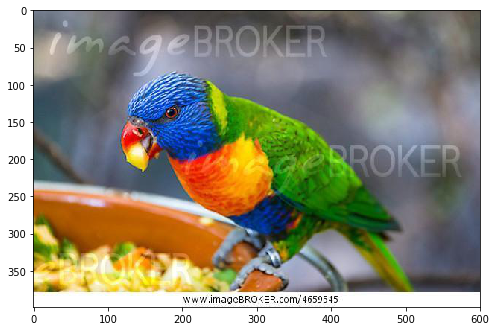

In [6]:
path = './imgs/testBird.jpg'
img = mpimg.imread(path)
show_img(img.astype('uint8'))

In [7]:
rows = img.shape[0]
cols = img.shape[1]

flat_img = img.reshape(img.shape[0] * img.shape[1], 3).astype(np.float)
cmpr = EM(flat_img,64,init_cov_size=30)

In [8]:
a = cmpr.fit(20)

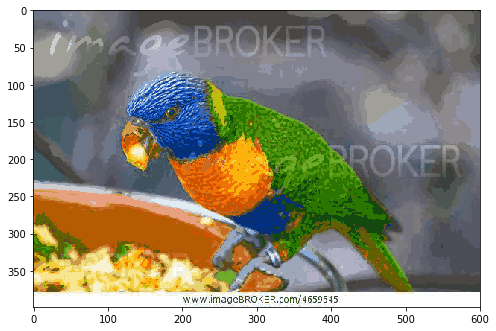

In [9]:
cmpr_img = (cmpr.predict(flat_img)).astype('uint8').reshape(rows,cols, 3)
show_img(cmpr_img)